In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_train = pd.read_csv("train.csv")
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df_test = pd.read_csv('test.csv')
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
print(df_train.shape)
print(df_test.shape)

(614, 13)
(367, 12)


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df_train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df_train = df_train.drop(['Loan_ID'],axis=1)
df_train.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


<AxesSubplot:xlabel='Gender', ylabel='count'>

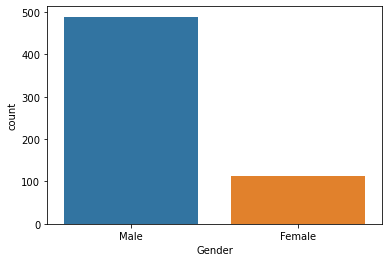

In [9]:
sns.countplot(x='Gender',data = df_train)

In [10]:
# sns.countplot(x='Loan_Status',data = df_train)

In [11]:
pd.crosstab(df_train.Gender, df_train.Loan_Status, margins=True)

Loan_Status,N,Y,All
Gender,,,
Female,37,75,112
Male,150,339,489
All,187,414,601


In [12]:
# pd.crosstab(df_train.Married, df_train.Loan_Status, margins=True)

In [13]:
# pd.crosstab(df_train.Self_Employed, df_train.Loan_Status, margins=True)

In [14]:
# pd.crosstab(df_train.Education, df_train.Loan_Status, margins=True)

In [15]:
# pd.crosstab(df_train.Property_Area, df_train.Loan_Status, margins=True)

In [16]:
df_train.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [17]:
df_train.Gender.isna().sum()

13

In [18]:
df_train.Gender.mode()[0]

'Male'

In [19]:
df_train['Gender'] = df_train['Gender'].map({'Male' : 1, 'Female' : 0})
df_train['Gender'] = df_train['Gender'].fillna(df_train['Gender'].mode()[0])
df_train['Gender'] = df_train['Gender'].astype(int)
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [20]:
df_test['Gender'] = df_test['Gender'].map({'Male' : 1, 'Female' : 0})
df_test['Gender'] = df_test['Gender'].fillna(df_test['Gender'].mode()[0])
df_test['Gender'] = df_test['Gender'].astype(int)
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,1,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,1,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,1,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,1,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [21]:
df_train.Dependents.unique() #size of family

array(['0', '1', '2', '3+', nan], dtype=object)

In [22]:
df_train.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

([<matplotlib.patches.Wedge at 0x22f9311c0a0>,
 [Text(-1.1174107288358017, -0.27183315302339933, '0'),
  Text(0.9752197542824417, -0.6094640521452388, '1'),
  Text(1.0058289398472173, 0.5575016984420968, '2'),
  Text(0.30394853619671475, 1.1091056249717042, '3+')],
 [Text(-0.6315799771680617, -0.15364482562192136, '57.6%'),
  Text(0.5512111654639887, -0.34447968164730886, '17.0%'),
  Text(0.568512009478862, 0.31510965564118515, '16.9%'),
  Text(0.17179699871988224, 0.6268857880274848, '8.5%')])

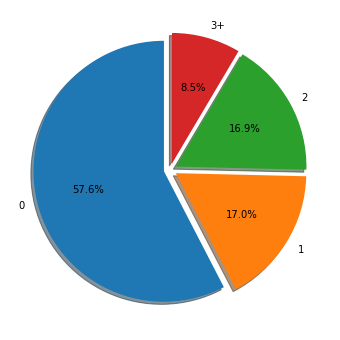

In [23]:
plt.figure(figsize=(6,6))
counts = [345,102,101,51]
explode = (0.05, 0.05, 0.05, 0.05)
labels=['0', '1', '2', '3+']
plt.pie(x=counts, labels=labels,explode=explode,autopct='%1.1f%%', shadow = True, startangle = 90)


In [24]:
pd.crosstab(df_train.Dependents, df_train.Loan_Status, margins=True)

Loan_Status,N,Y,All
Dependents,,,
0,107,238,345
1,36,66,102
2,25,76,101
3+,18,33,51
All,186,413,599


In [25]:
df_train['Dependents'].isna().sum()

15

In [26]:
df_train['Dependents'].mode()[0]

'0'

In [27]:
df_train['Dependents'] = df_train['Dependents'].map({'0' : 0, '1' : 1,'2' : 2,'3+' : 3})
df_train['Dependents'] = df_train['Dependents'].fillna(df_train['Dependents'].mode()[0])
df_train['Dependents'] = df_train['Dependents'].astype(int)
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [28]:
df_train['Dependents'].isna().sum()

0

In [29]:
df_test['Dependents'] = df_test['Dependents'].map({'0' : 0, '1' : 1,'2' : 2,'3+' : 3})
df_test['Dependents'] = df_test['Dependents'].fillna(df_test['Dependents'].mode()[0])
df_test['Dependents'] = df_test['Dependents'].astype(int)
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,1,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,1,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,1,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,1,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [30]:
df_test['Dependents'].isna().sum()

0

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

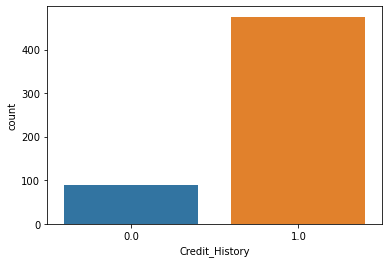

In [31]:
sns.countplot(df_train['Credit_History'])

In [32]:
pd.crosstab(df_train.Credit_History, df_train.Loan_Status, margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [33]:
df_train['Credit_History'].isna().sum()

50

In [34]:
df_train['Credit_History'].mode()[0]

1.0

In [35]:
df_train['Credit_History'] = df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0])

In [36]:
df_test['Credit_History'] = df_test['Credit_History'].fillna(df_test['Credit_History'].mode()[0])

In [37]:
df_train['Credit_History'].isna().sum()

0

In [38]:
df_train.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

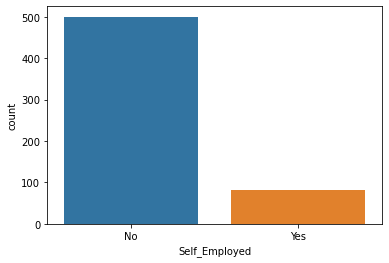

In [39]:
sns.countplot(x=df_train['Self_Employed'],data=df_train)

In [40]:
pd.crosstab(df_train['Self_Employed'], df_train['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Self_Employed,,,
No,157,343,500
Yes,26,56,82
All,183,399,582


In [41]:
df_train['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [42]:
df_train['Self_Employed'].isna().sum()

32

In [43]:
df_train['Self_Employed'] = df_train['Self_Employed'].map({'Yes': 0, 'No': 1})
df_test['Self_Employed'] = df_test['Self_Employed'].map({'Yes': 0, 'No': 1})
df_train.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,No,0,Graduate,1.0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,Yes,1,Graduate,1.0,4583,1508.0,128.0,360.0,1.0,Rural,N


In [44]:
df_train['Self_Employed'].mode()[0]

1.0

In [45]:
df_test['Self_Employed'].mode()[0]

1.0

In [46]:
df_train['Self_Employed'] = df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0])
df_test['Self_Employed'] = df_test['Self_Employed'].fillna(df_test['Self_Employed'].mode()[0])
df_train.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,No,0,Graduate,1.0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,Yes,1,Graduate,1.0,4583,1508.0,128.0,360.0,1.0,Rural,N


<AxesSubplot:xlabel='Married', ylabel='count'>

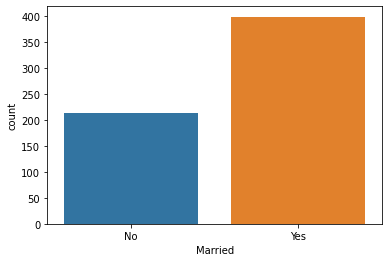

In [47]:
sns.countplot(df_train['Married'])

In [48]:
pd.crosstab(df_train['Married'],df_train['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Married,,,
No,79,134,213
Yes,113,285,398
All,192,419,611


In [49]:
df_train['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [50]:
df_train['Married'] = df_train['Married'].map({'Yes':1,'No':0})
df_test['Married'] = df_test['Married'].map({'Yes':1,'No':0})

In [51]:
df_train['Married'] = df_train['Married'].fillna(df_train['Married'].mode()[0])
df_test['Married'] = df_test['Married'].fillna(df_test['Married'].mode()[0])
df_train.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0.0,0,Graduate,1.0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,1.0,1,Graduate,1.0,4583,1508.0,128.0,360.0,1.0,Rural,N


In [52]:
df_train = df_train.drop(['Loan_Amount_Term'],axis=1)
df_train.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,1,0.0,0,Graduate,1.0,5849,0.0,NaN,1.0,Urban,Y
1,1,1.0,1,Graduate,1.0,4583,1508.0,128.0,1.0,Rural,N


In [53]:
df_train['LoanAmount'].isna().sum()

22

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

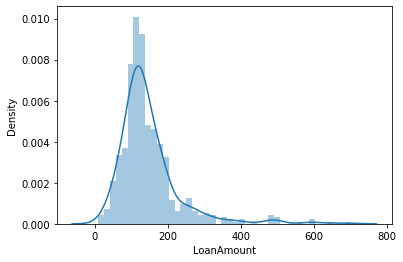

In [54]:
sns.distplot(df_train['LoanAmount'])

In [55]:
df_train['LoanAmount'].mean()

146.41216216216216

In [56]:
df_train['LoanAmount'] = df_train['LoanAmount'].fillna(df_train['LoanAmount'].mean()).astype(int)
df_test['LoanAmount'] = df_test['LoanAmount'].fillna(df_test['LoanAmount'].mean()).astype(int)

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

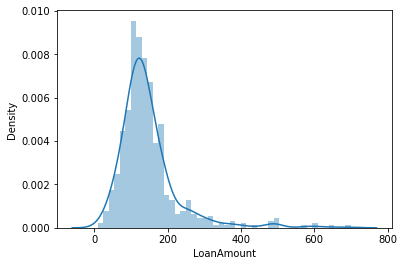

In [57]:
sns.distplot(df_train['LoanAmount'])

<AxesSubplot:xlabel='Education', ylabel='count'>

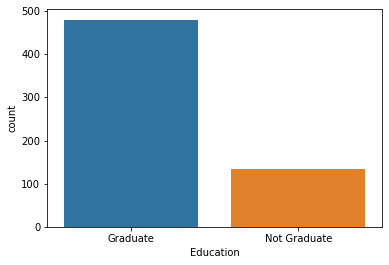

In [58]:
sns.countplot(df_train['Education'])

In [59]:
pd.crosstab(df_train['Education'],df_train['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Education,,,
Graduate,140,340,480
Not Graduate,52,82,134
All,192,422,614


In [60]:
df_train['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [61]:
df_train['Education'].isna().sum()

0

In [62]:
df_test['Education'].isna().sum()

0

In [63]:
df_train['Education'] = df_train['Education'].map({'Graduate':1, 'Not Graduate': 0}).astype(int)
df_test['Education'] = df_test['Education'].map({'Graduate':1, 'Not Graduate': 0}).astype(int)

df_train.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,1,0.0,0,1,1.0,5849,0.0,146,1.0,Urban,Y
1,1,1.0,1,1,1.0,4583,1508.0,128,1.0,Rural,N


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

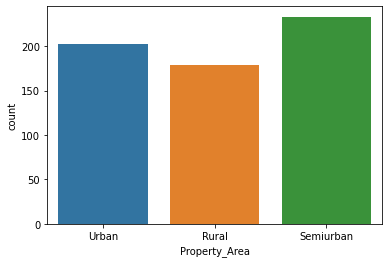

In [64]:
sns.countplot(df_train['Property_Area'])

In [65]:
pd.crosstab(df_train['Property_Area'], df_train['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Property_Area,,,
Rural,69,110,179
Semiurban,54,179,233
Urban,69,133,202
All,192,422,614


In [66]:
df_train['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [67]:
df_train['Property_Area'] = df_train['Property_Area'].map({'Urban':0, 'Rural':1, 'Semiurban':2}).astype(int)
df_test['Property_Area'] = df_test['Property_Area'].map({'Urban':0, 'Rural':1, 'Semiurban':2}).astype(int)
df_train.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,1,0.0,0,1,1.0,5849,0.0,146,1.0,0,Y
1,1,1.0,1,1,1.0,4583,1508.0,128,1.0,1,N


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

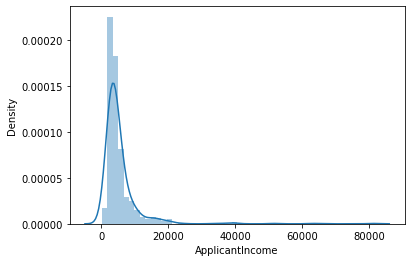

In [68]:
sns.distplot(df_train['ApplicantIncome'])

In [69]:
df_train[df_train['CoapplicantIncome'] <= 0 ] 

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,1,0.0,0,1,1.0,5849,0.0,146,1.0,0,Y
2,1,1.0,0,1,0.0,3000,0.0,66,1.0,0,Y
4,1,0.0,0,1,1.0,6000,0.0,141,1.0,0,Y
15,1,0.0,0,1,1.0,4950,0.0,125,1.0,0,Y
16,1,0.0,1,0,1.0,3596,0.0,100,1.0,0,Y
...,...,...,...,...,...,...,...,...,...,...,...
604,0,1.0,1,1,1.0,12000,0.0,496,1.0,2,Y
609,0,0.0,0,1,1.0,2900,0.0,71,1.0,1,Y
610,1,1.0,3,1,1.0,4106,0.0,40,1.0,1,Y
612,1,1.0,2,1,1.0,7583,0.0,187,1.0,0,Y


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

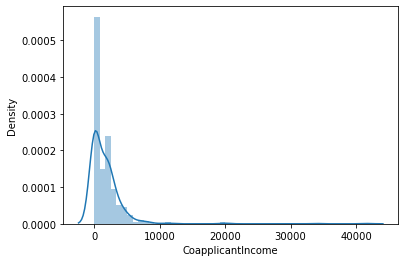

In [70]:
sns.distplot(df_train['CoapplicantIncome'])

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

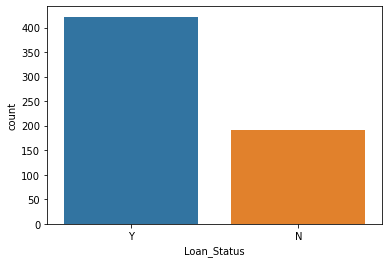

In [71]:
sns.countplot(df_train['Loan_Status'])

In [72]:
df_train['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [73]:
df_train['Loan_Status'] = df_train['Loan_Status'].map({'Y':1, 'N':0}).astype(int)
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,1,0.0,0,1,1.0,5849,0.0,146,1.0,0,1
1,1,1.0,1,1,1.0,4583,1508.0,128,1.0,1,0
2,1,1.0,0,1,0.0,3000,0.0,66,1.0,0,1
3,1,1.0,0,0,1.0,2583,2358.0,120,1.0,0,1
4,1,0.0,0,1,1.0,6000,0.0,141,1.0,0,1


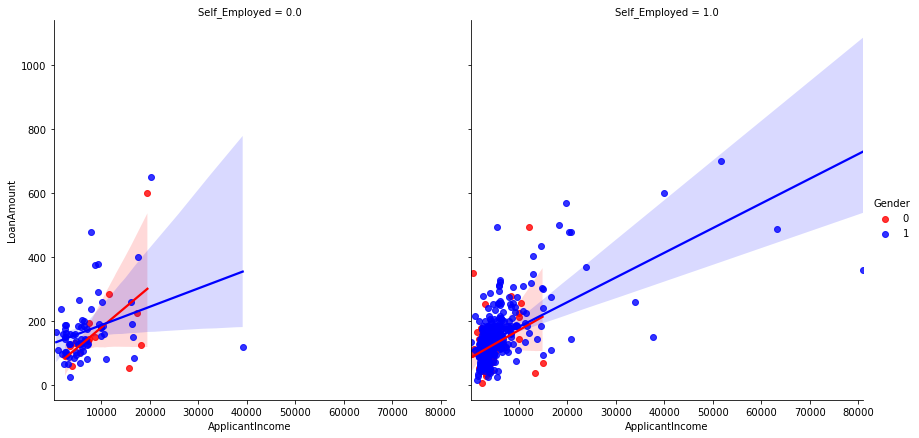

In [74]:
sns.lmplot(x='ApplicantIncome',y='LoanAmount',data= df_train , col='Self_Employed', hue='Gender',
          palette= ["Red" , "Blue", "Green"] ,aspect=1,size=6)


<AxesSubplot:xlabel='Property_Area', ylabel='LoanAmount'>

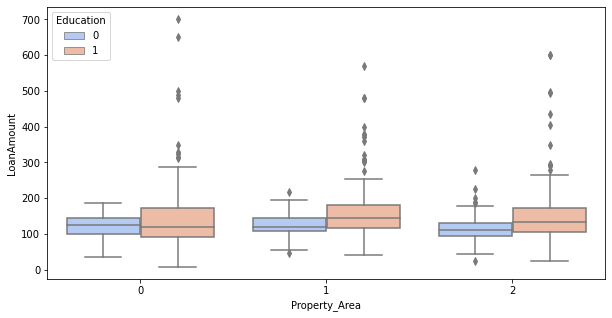

In [75]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Property_Area", y="LoanAmount", hue="Education",data=df_train, palette="coolwarm")

<AxesSubplot:xlabel='Credit_History'>

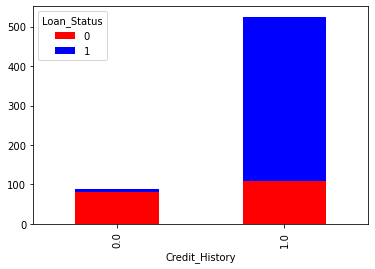

In [76]:
lc = pd.crosstab(df_train['Credit_History'], df_train['Loan_Status'])
lc.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

<AxesSubplot:>

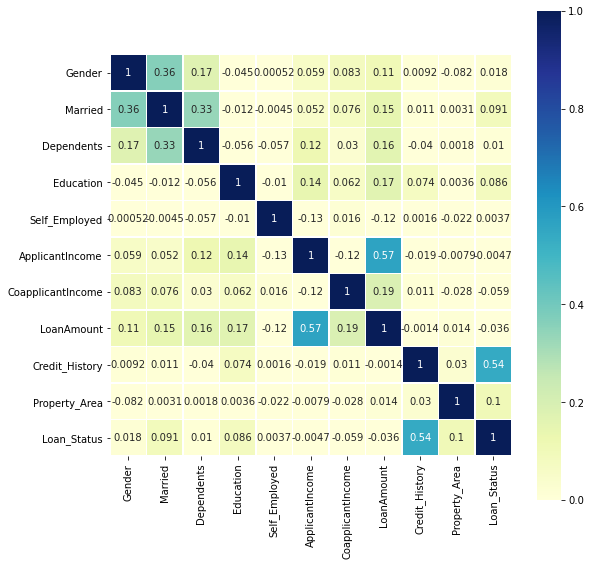

In [90]:
plt.figure(figsize=(9,9))
sns.heatmap(df_train.corr(), vmin=0, vmax=1, square=True, annot=True,cmap="YlGnBu",linewidths=.5)

In [78]:
X = df_train.drop(['Loan_Status'],axis=1)
y = df_train.Loan_Status

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [80]:
print(X_train.shape)
print(X_test.shape)

(491, 10)
(123, 10)


In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [82]:
model_params = {
    'logistic_reg' : {
        'model' : LogisticRegression(),
        'params' : {
            'C' : [1,5,10]
        }
    },
    
    'decision_tree': {
        'model' : DecisionTreeClassifier(random_state=0),
        'params' : {
            'criterion' : ["gini", "entropy"],
            'splitter' : ["best", "random"],
            'max_depth' : [1,5,10,15]
        }
    },
    
    'svm' : {
        'model' : SVC(),
        'params': {
            'C' : [1,5,10],
            'degree' : [3,5,10],
#             'kernel' : ['rbf','linear']
        }
    },
    
    'KNN' : {
        'model' : KNeighborsClassifier(),
        'params' : {
            'n_neighbors' : [5,10,15,20]
        }
    },
    
    'random_forest' : {
        'model' : RandomForestClassifier(random_state=0),
        'params' : {
            'n_estimators' : [100,150,200],
            'criterion' : ["gini", "entropy"],
            'max_depth' : [1,5,10,15]
        }
    }
    
#     'naive_bayes' : {
#         'model' : GaussianNB()
#     }
}

In [83]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [89]:
scores = []
for model_name,mp in model_params.items():
    gscv = GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    gscv.fit(X_train,y_train)
    scores.append({
        'model' : model_name,
        'score' : gscv.best_score_,
        'best_params' : gscv.best_params_
    })
    
df_scores = pd.DataFrame(scores, columns=['model','score','best_params'])
df_scores

,model,score,best_params
0,logistic_reg,0.802391,{'C': 10}
1,decision_tree,0.804432,"{'criterion': 'gini', 'max_depth': 1, 'splitte..."
2,svm,0.676170,"{'C': 1, 'degree': 3}"
3,KNN,0.672088,{'n_neighbors': 15}
4,random_forest,0.804432,"{'criterion': 'gini', 'max_depth': 5, 'n_estim..."


In [85]:
scores

[{'model': 'logistic_reg',
  'score': 0.8023912595341166,
  'best_params': {'C': 10}},
 {'model': 'decision_tree',
  'score': 0.8044320758606472,
  'best_params': {'criterion': 'gini', 'max_depth': 1, 'splitter': 'best'}},
 {'model': 'svm',
  'score': 0.6761698618841476,
  'best_params': {'C': 1, 'degree': 3}},
 {'model': 'KNN',
  'score': 0.6720882292310864,
  'best_params': {'n_neighbors': 15}},
 {'model': 'random_forest',
  'score': 0.8044320758606472,
  'best_params': {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 100}}]

In [86]:
from sklearn.metrics import accuracy_score

logmodel = LogisticRegression()
logmodel.fit(X_train , y_train)
pred_l = logmodel.predict(X_test)
acc_l = accuracy_score(y_test , pred_l)*100
acc_l

83.73983739837398

In [87]:
random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, y_train)
pred_rf = random_forest.predict(X_test)
acc_rf = accuracy_score(y_test , pred_rf)*100
acc_rf

76.42276422764228

In [88]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
pred_gb = gaussian.predict(X_test)
acc_gb = accuracy_score(y_test , pred_gb)*100
acc_gb

82.92682926829268